In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-03-27 21:56:50--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.18’

insurance.csv.18    100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2023-03-27 21:56:50 (4.43 MB/s) - ‘insurance.csv.18’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
# Feature Engeneering
dataset.describe() #There're no null values

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [4]:
dataset.describe(include='O') #There're no null values

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [5]:
print(dataset['sex'].value_counts(), '\n')

print(dataset['smoker'].value_counts(), '\n')

print(dataset['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64 

no     1064
yes     274
Name: smoker, dtype: int64 

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [6]:
#Now, let's convert the non-numerical data to numerical data
dataset_copy = dataset.copy()

dataset_copy['sex'] = dataset['sex'].apply(lambda v: 1 if v=='male' else 0).astype(int)
print(dataset_copy['sex'].value_counts(), '\n')

dataset_copy['smoker'] = dataset['smoker'].apply(lambda v: 1 if v=='yes' else 0).astype(int)
print(dataset_copy['smoker'].value_counts(), '\n')

dataset_copy['region'] = dataset['region'].apply(lambda v: 3 if v=='southeast' else 2 if v=='southwest' else 1 if v=='northwest' else 0).astype(int)
print(dataset_copy['region'].value_counts())

1    676
0    662
Name: sex, dtype: int64 

0    1064
1     274
Name: smoker, dtype: int64 

3    364
2    325
1    325
0    324
Name: region, dtype: int64


In [7]:
dataset_copy.describe() #Now, all values are in a numerical shape

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,1.544843,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,1.130197,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,1.000000,4740.287500
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,3.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,63770.430000


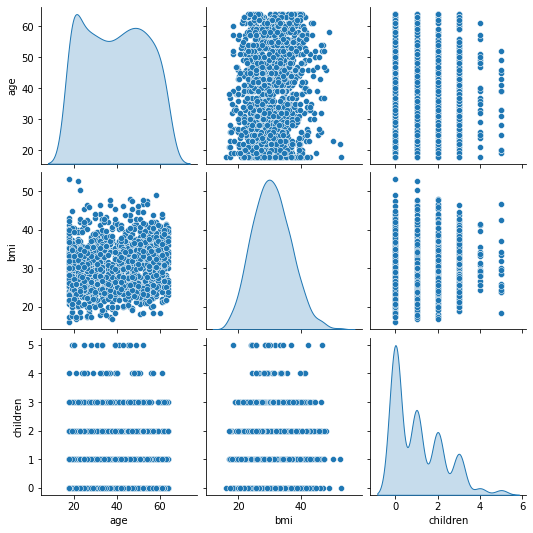

In [8]:
#Inspect some of the data
analyses = ['age','bmi','children']
sns.pairplot(dataset_copy[analyses], diag_kind='kde')


In [9]:
# It's time to normalize these features:
values = ['age','sex','bmi','children','smoker','region']
for v in values:
  max_value = dataset_copy[v].max()
  min_value = dataset_copy[v].min()
  dataset_copy[v] = (dataset_copy[v] - min_value) / (max_value - min_value)

dataset_copy.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.505232,0.395296,0.218984,0.204783,0.514948,13270.422414
std,0.305434,0.500160,0.164377,0.241099,0.403694,0.376732,12110.011240
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.870000
25%,0.195652,0.000000,0.277628,0.000000,0.000000,0.333333,4740.287500
50%,0.456522,1.000000,0.388140,0.200000,0.000000,0.666667,9382.030000
75%,0.717391,1.000000,0.504043,0.400000,0.000000,1.000000,16639.915000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,63770.430000


In [10]:
#Split the data into training and test sets
train_dataset = dataset_copy.sample(frac=0.8, random_state=0)
test_dataset = dataset_copy.drop(train_dataset.index)

#Split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('expenses')
test_labels = test_features.pop('expenses')

In [11]:
train_features.describe()

,age,sex,bmi,children,smoker,region
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,0.457314,0.498131,0.397232,0.218692,0.199065,0.516199
std,0.307437,0.500230,0.163482,0.242273,0.399484,0.381324
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.000000,0.277628,0.000000,0.000000,0.333333
50%,0.456522,0.000000,0.390836,0.200000,0.000000,0.666667
75%,0.717391,1.000000,0.506739,0.400000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
train_labels.describe()

count     1070.000000
mean     13056.551654
std      11994.260172
min       1121.870000
25%       4565.995000
50%       9289.085000
75%      15826.112500
max      60021.400000
Name: expenses, dtype: float64

In [13]:
#Creation and compiling of the model
model = keras.Sequential([
  layers.Dense(64, activation='relu', input_shape=[len(train_features.keys())]),
  layers.Dense(64, activation='relu', use_bias=True),
  layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.1)

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])

In [14]:
#Training the model
history = model.fit(
  train_features, 
  train_labels,
  epochs=400, 
  validation_split = 0.2, 
  verbose=0)

9/9 - 0s - loss: 34054328.0000 - mae: 3196.7551 - mse: 34054328.0000 - 39ms/epoch - 4ms/step
Testing set Mean Abs Error: 3196.76 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


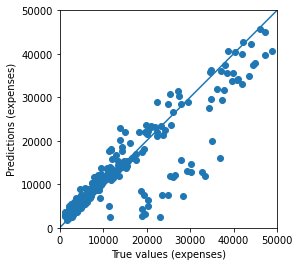

In [15]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_features, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
